In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix 
from keras_preprocessing.image import ImageDataGenerator
# import splitfolders

In [3]:
# splitfolders.ratio('dataset',output='Data',ratio=(0.7,0.1,0.2))

# Load Data dan Pre Processing Data

In [4]:
class_names = ['Boot','Sandal','Shoe']
class_names

['Boot', 'Sandal', 'Shoe']

In [5]:
augment = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=50,
    horizontal_flip=True
)

standard = ImageDataGenerator(
    rescale = 1./255,
)

In [6]:
train = augment.flow_from_directory(
    'Data/train/',
    target_size = (105,105),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale',
)

test = standard.flow_from_directory(
    'Data/test/',
    target_size = (105,105),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

val = standard.flow_from_directory(
    'Data/val/',
    target_size = (105,105),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 10500 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


### Meta Data

In [7]:
data_train = []
data_test = []
data_val = []

for i in range(len(train)) :
    x,y = train.next()
    for j in range(len(y)) :
        data_train.append(class_names[tf.argmax(y[j])])

for i in range(len(test)) :
    x,y = test.next()
    for j in range(len(y)) :
        data_test.append(class_names[tf.argmax(y[j])])
        
for i in range(len(val)) :
    x,y = val.next()
    for j in range(len(y)) :
        data_val.append(class_names[tf.argmax(y[j])])

banyak_data = len(data_train) + len(data_test) + len(data_val)

print("Nama Dataset      : Shoe vs Sandal vs Boot Image Dataset")
print("Ukuran Gambar     : [105,105,1]")
print("Kelas             :",class_names)
print("Banyak Data       :",banyak_data)
print("Banyak Data Train :",len(data_train))
print("Banyak Data Test  :",len(data_test))
print("Banyak Data Test  :",len(data_val))

Nama Dataset      : Shoe vs Sandal vs Boot Image Dataset
Ukuran Gambar     : [105,105,1]
Kelas             : ['Boot', 'Sandal', 'Shoe']
Banyak Data       : 15000
Banyak Data Train : 10500
Banyak Data Test  : 3000
Banyak Data Test  : 1500


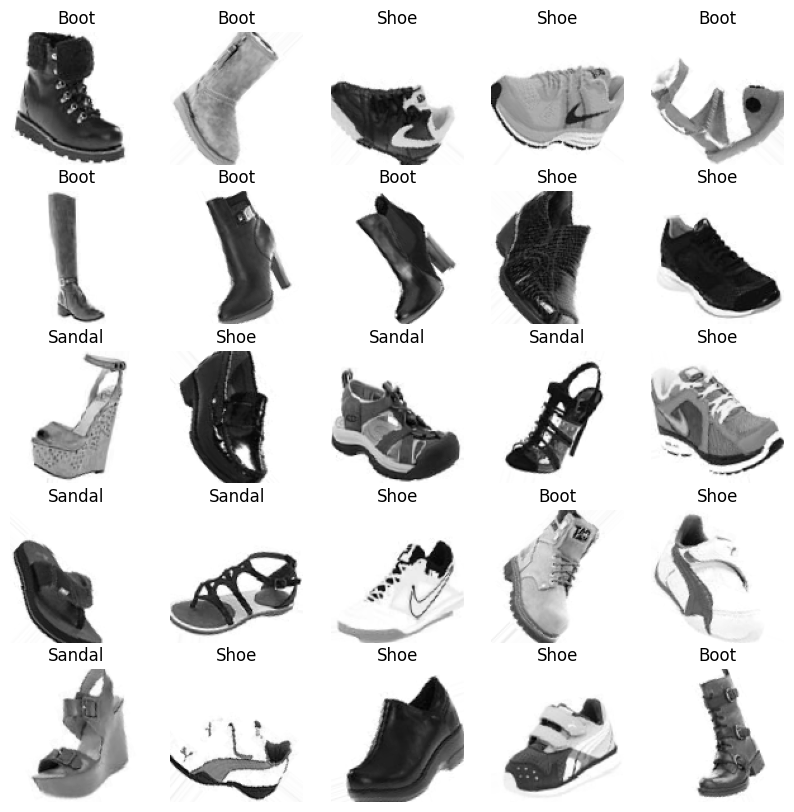

In [9]:
plt.figure(figsize=(10, 10))

images,labels = train.next()

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i],cmap='gray')
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

plt.show()

### Visualisasi Data yang digunakan

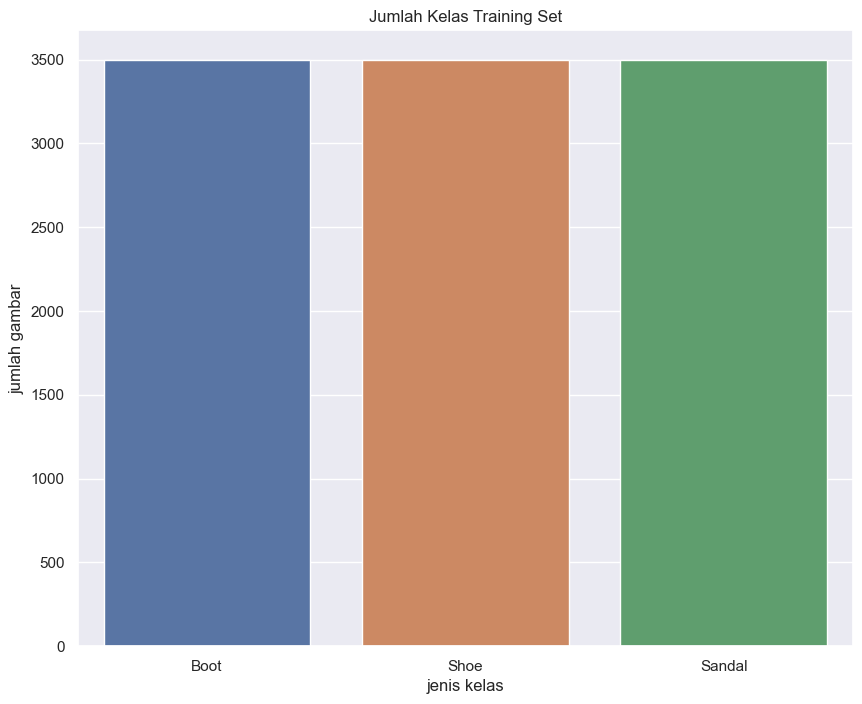

In [8]:
kelas = []

for i in range(len(train)) :
    x,y = train.next()
    for j in range(len(y)) :
        kelas.append(class_names[tf.argmax(y[j])])

plt.figure(figsize=(10, 8))

sns.set_theme()

sns.countplot(x=kelas)
plt.xlabel('jenis kelas')
plt.ylabel('jumlah gambar')
plt.title('Jumlah Kelas Training Set')
plt.show()  


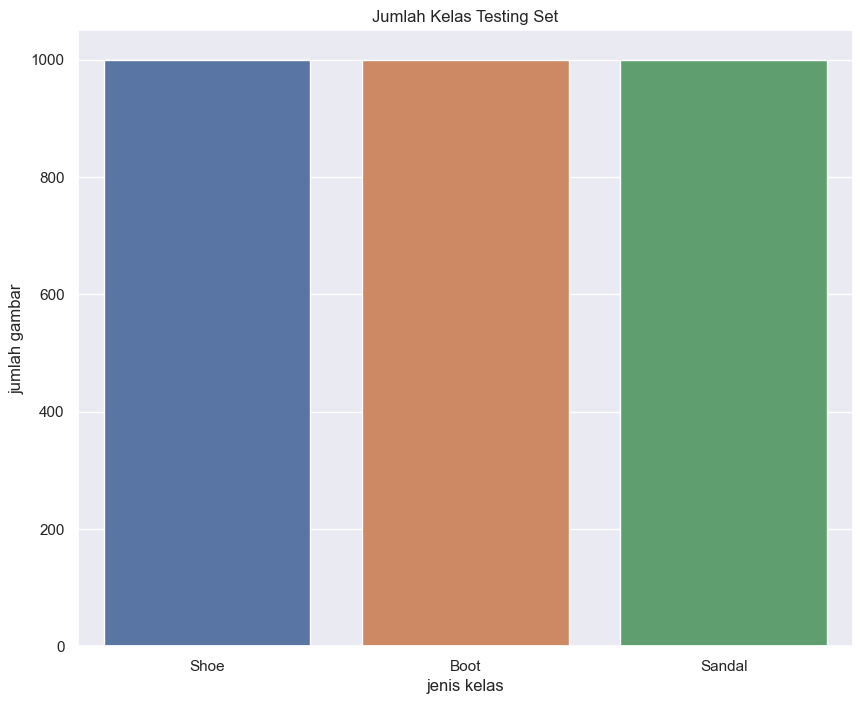

In [9]:
kelas = []

for i in range(len(test)) :
    x,y = test.next()
    for j in range(len(y)) :
        kelas.append(class_names[tf.argmax(y[j])])

plt.figure(figsize=(10, 8))

sns.set_theme()

sns.countplot(x=kelas)
plt.xlabel('jenis kelas')
plt.ylabel('jumlah gambar')
plt.title('Jumlah Kelas Testing Set')
plt.show()  

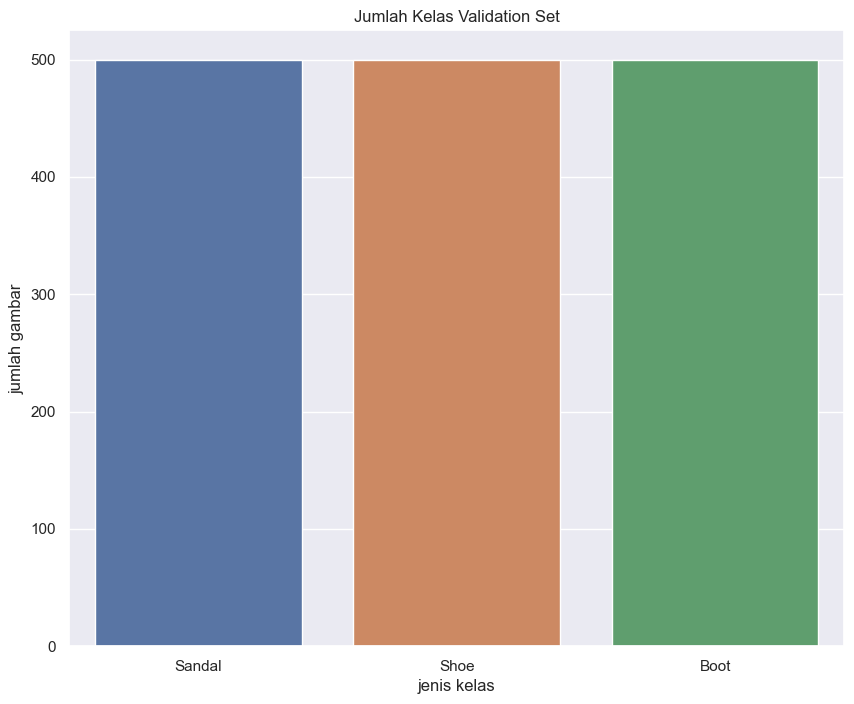

In [10]:
kelas = []

for i in range(len(val)) :
    x,y = val.next()
    for j in range(len(y)) :
        kelas.append(class_names[tf.argmax(y[j])])

plt.figure(figsize=(10, 8))

sns.set_theme()

sns.countplot(x=kelas)
plt.xlabel('jenis kelas')
plt.ylabel('jumlah gambar')
plt.title('Jumlah Kelas Validation Set')
plt.show()  

# Modelling

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=[105, 105, 1]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 103, 103, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 51, 51, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 8)        0

In [14]:
model.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.95):
            self.model.stop_training = True

In [16]:
hasil = model.fit(train, epochs=30, batch_size=128,validation_data=val,verbose=1,callbacks=[myCallback()])

Epoch 1/30
329/329 [==============================] - 55s 165ms/step - loss: 0.6820 - accuracy: 0.6849 - val_loss: 0.4107 - val_accuracy: 0.8347
Epoch 2/30
329/329 [==============================] - 45s 135ms/step - loss: 0.3861 - accuracy: 0.8468 - val_loss: 0.2804 - val_accuracy: 0.8933
Epoch 3/30
329/329 [==============================] - 44s 134ms/step - loss: 0.2967 - accuracy: 0.8874 - val_loss: 0.2612 - val_accuracy: 0.8907
Epoch 4/30
329/329 [==============================] - 44s 135ms/step - loss: 0.2636 - accuracy: 0.9034 - val_loss: 0.1998 - val_accuracy: 0.9167
Epoch 5/30
329/329 [==============================] - 44s 135ms/step - loss: 0.2431 - accuracy: 0.9107 - val_loss: 0.2349 - val_accuracy: 0.9047
Epoch 6/30
329/329 [==============================] - 45s 136ms/step - loss: 0.2166 - accuracy: 0.9200 - val_loss: 0.2251 - val_accuracy: 0.9207
Epoch 7/30
329/329 [==============================] - 45s 135ms/step - loss: 0.1925 - accuracy: 0.9303 - val_loss: 0.1776 - val_ac

# Evaluasi Model

In [17]:
evaluasi = model.evaluate(test,verbose=0)
print("Akurasi : ",evaluasi[1])
print("Loss    : ",evaluasi[0])

Akurasi :  0.9653333425521851
Loss    :  0.10044287145137787


### Testing Validasi

1/1 [==============================] - 0s 22ms/step


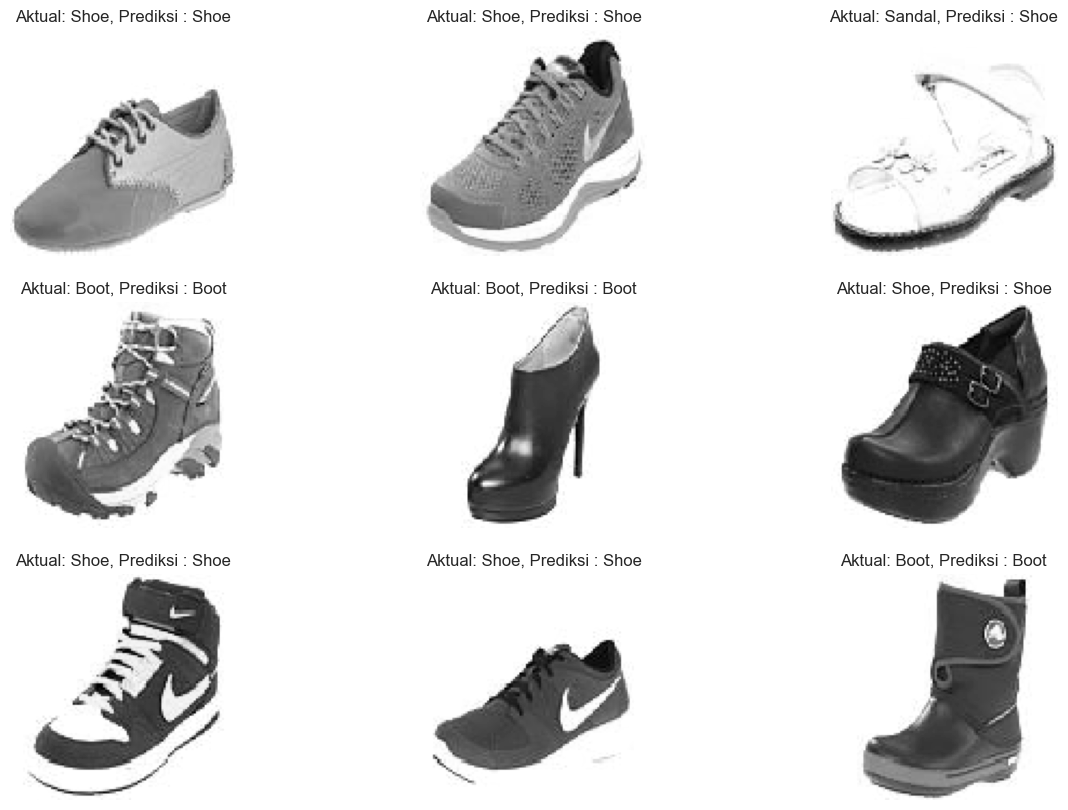

In [18]:
image ,label = next(iter(test))
plt.figure(figsize=(15,10))
for i in range(9) :
    Aktual = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=1))
    plt.imshow(tf.squeeze(image[i]),cmap='gray')
    plt.title(f'Aktual: {Aktual}, Prediksi : {class_names[y_pred]}')

### Testing Error

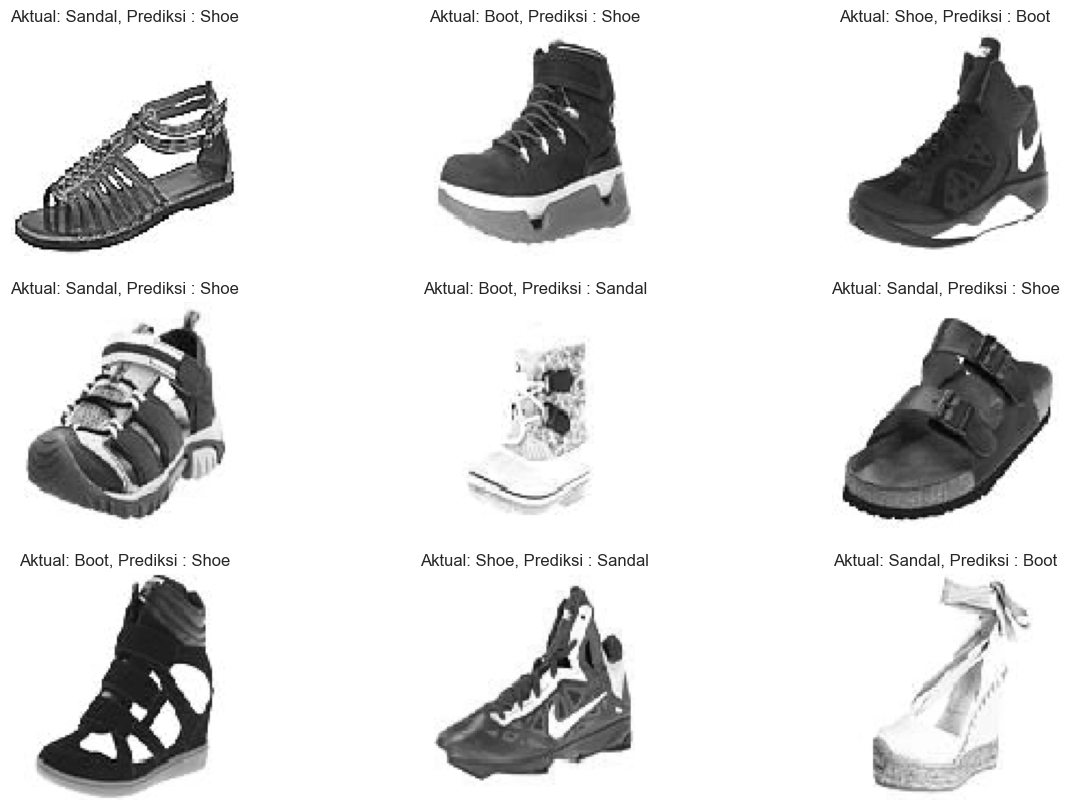

In [20]:
plt.figure(figsize=(15,10))
actu = []
im = []
pred = []
for i in range(len(test)) :
    image,label = test.next()
    for j in range(32) :
        if (len(actu) == 9) :
            break
        Aktual = class_names[np.argmax(label[j])]
        y_pred = np.argmax(model.predict(image[j][None,...],verbose=0))
        if (Aktual != class_names[y_pred]) :
            actu.append(Aktual)
            im.append(image[j])
            pred.append(y_pred)

for k in range(9) :
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(tf.squeeze(im[k]),cmap='gray')
    plt.title(f'Aktual: {actu[k]}, Prediksi : {class_names[pred[k]]}')

### Visualisasi hasil prediksi

In [26]:
y_test = []
y_pred = []

for i in range(len(test)) :
    x,y = test.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

print("Banyak data yang di tes      : ",len(y_test))
print("Banyak data yang di prediksi : ",len(y_pred)) 

Banyak data yang di tes      :  3000
Banyak data yang di prediksi :  3000


Keterangan
0 : Boot
1 : Sandal
2 : Shoe


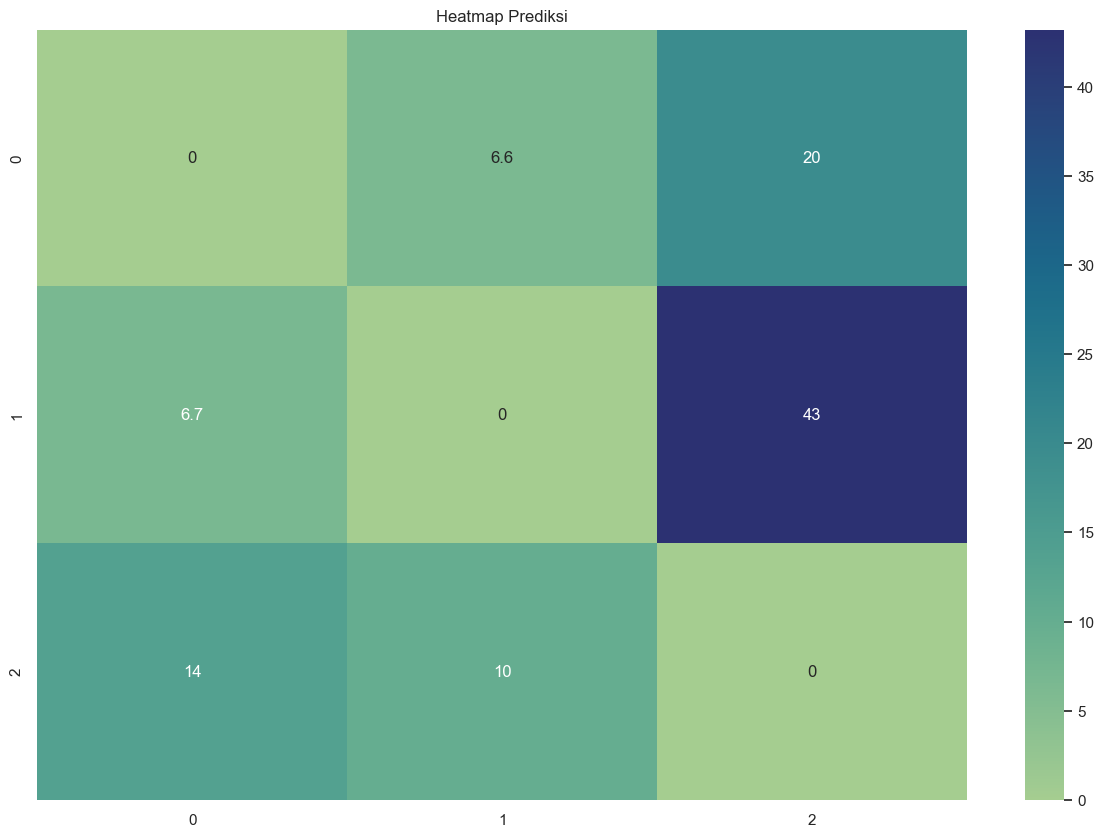

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=class_names, normalize='true') * 100

plt.figure(figsize=(15,10))
np.fill_diagonal(cm, 0)
cm = cm *100 / cm.sum()
sns.heatmap(cm, annot=True, cmap="crest")
plt.title('Heatmap Prediksi')
print("Keterangan")
print("0 :",class_names[0])
print("1 :",class_names[1])
print("2 :",class_names[2])

### Perbandingan Akurasi dan Loss Model

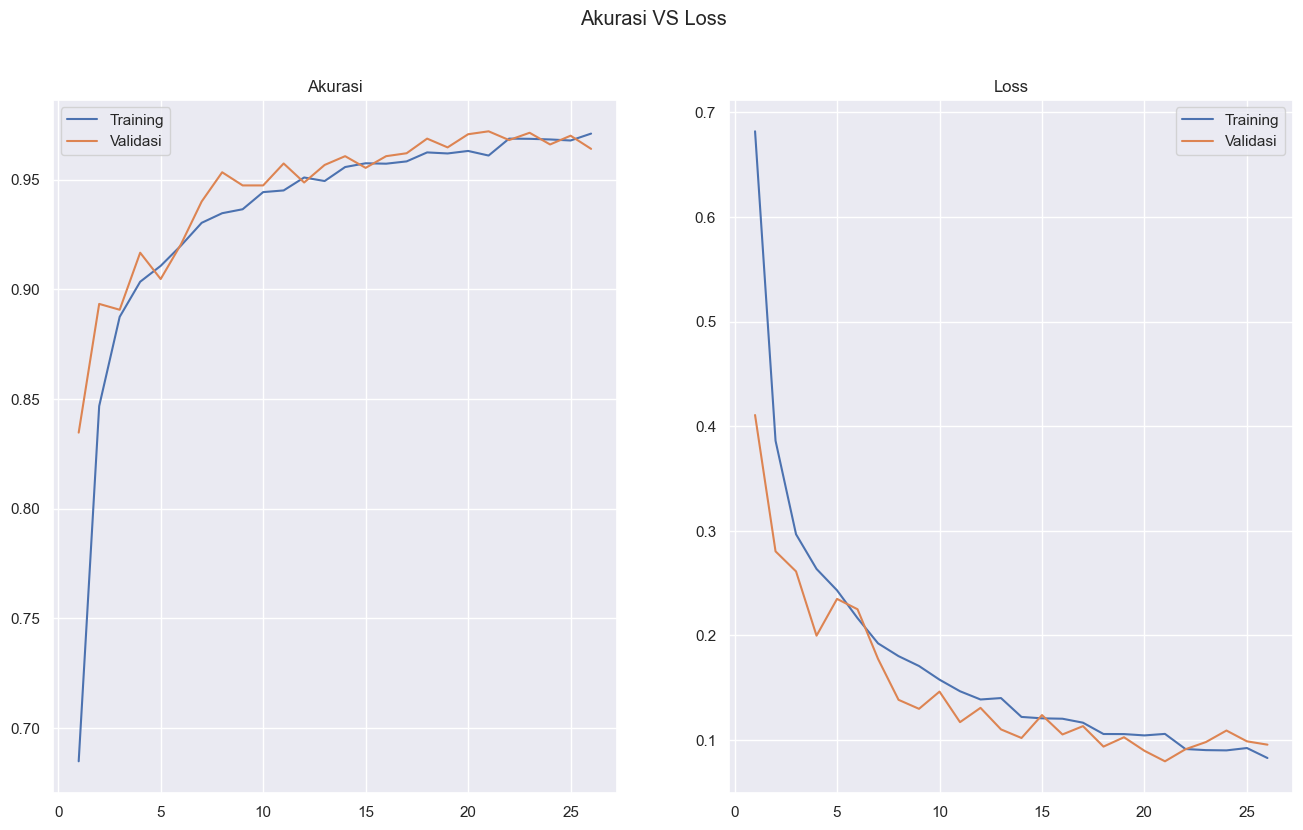

In [29]:
plt.figure(figsize=(16,9))

epochs = [i+1 for i in range(26)]

plt.suptitle('Akurasi VS Loss')

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs, hasil.history['accuracy'], label='Training')
plt.plot(epochs, hasil.history['val_accuracy'], label='Validasi')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, hasil.history['loss'], label='Training')
plt.plot(epochs, hasil.history['val_loss'], label='Validasi')
plt.title("Loss")
plt.legend()

plt.show()

# Save Model

In [30]:
model.save('ModelPAKB.h5')

# Percobaan Testing dengan data riil

In [31]:
pre_input = ImageDataGenerator(
    rescale=1./255,
)

In [32]:
data_input = pre_input.flow_from_directory(
    'Data/inputan/',
    target_size = (105,105),
    color_mode = 'grayscale'
)

Found 25 images belonging to 1 classes.


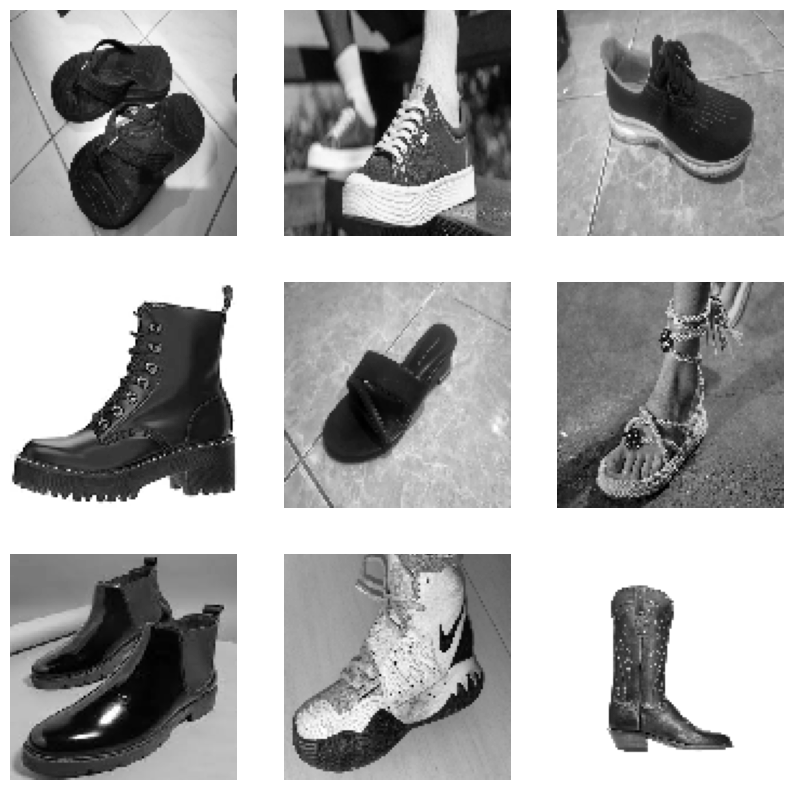

In [33]:
plt.figure(figsize=(10, 10))

images,labels = data_input.next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i],cmap='gray')
    plt.axis("off")

plt.show()

## Prediksi Data

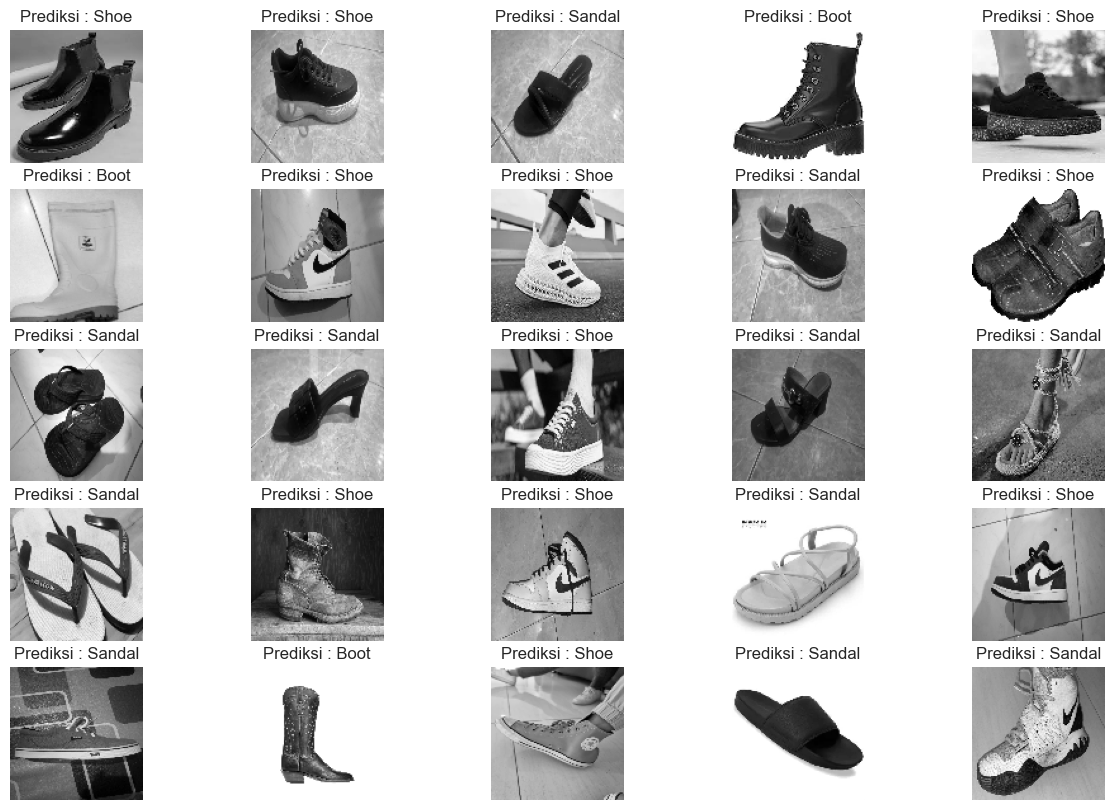

In [34]:
image,label = next(iter(data_input))
plt.figure(figsize=(15,10))
for i in range(25) :
    Aktual = class_names[np.argmax(label[i])]
    plt.subplot(5,5,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]),cmap='gray')
    plt.title(f'Prediksi : {class_names[y_pred]}')

# TERIMA KASIH